# Bootcamp Project 4
## =================
# Group members

- Deema Alkhudairi
- Fai Alamri
- Hisham Altayieb 

## This analysis process will contain the following questions:
   - Q1: How impactful aluminium is on our data?
   - Q2: How impactful cadmium is on our data?
   - Q3: How impactful chromium is on our data?
   - Q4: Does bacteria have a negative effect on the water's safety?
   - Q5: Does mercury have a negative effect on the water's safety?
   - Q:6 What are the components that can affect water cleaniness?
   - Deema
   - Deema


## Importing and loading DFs, and the libraries 

In [74]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score  
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from dataprep.eda import plot, plot_correlation, create_report, plot_missing

## Read Data

In [75]:
#load data
water = pd.read_csv('waterQuality1.csv')

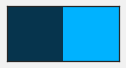

In [76]:
#Import ploting libraries
#import matplotlib.pyplot as plt
#import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots 

#styling future plots
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

# ==========================================

# EDA 

In [77]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [78]:
water.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [79]:
water.shape

(7999, 21)

In [80]:
water.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.67,1.27,0.0,0.04,0.07,0.28,5.05
arsenic,7999.0,0.16,0.25,0.0,0.03,0.05,0.10,1.05
barium,7999.0,1.57,1.22,0.0,0.56,1.19,2.48,4.94
cadmium,7999.0,0.04,0.04,0.0,0.01,0.04,0.07,0.13
chloramine,7999.0,2.18,2.57,0.0,0.10,0.53,4.24,8.68
chromium,7999.0,0.25,0.27,0.0,0.05,0.09,0.44,0.90
copper,7999.0,0.81,0.65,0.0,0.09,0.75,1.39,2.00
flouride,7999.0,0.77,0.44,0.0,0.40,0.77,1.16,1.50
bacteria,7999.0,0.32,0.33,0.0,0.00,0.22,0.61,1.00
viruses,7999.0,0.33,0.38,0.0,0.00,0.01,0.70,1.00


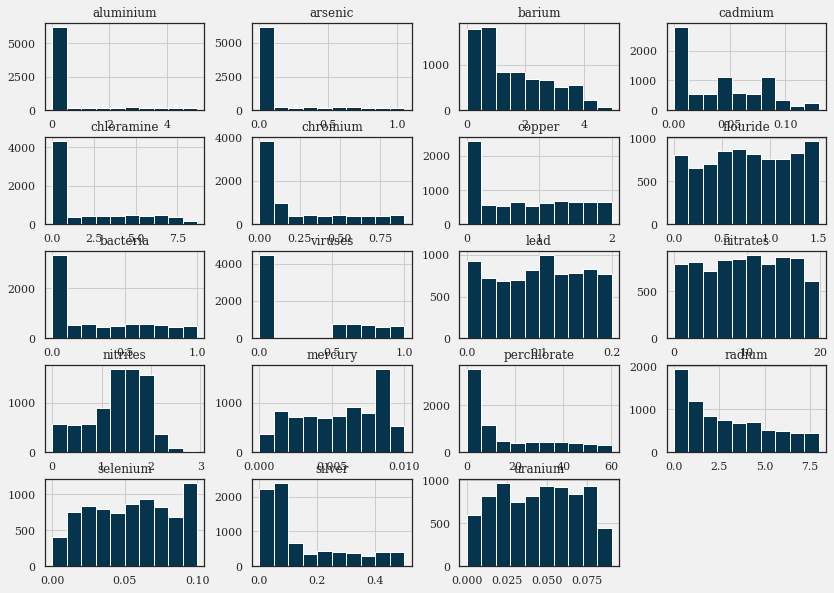

In [81]:
water.hist(figsize=(14,10));

In [82]:
water.var()

aluminium        1.600592
arsenic          0.063802
barium           1.478878
cadmium          0.001300
chloramine       6.589630
chromium         0.073246
copper           0.427113
flouride         0.189549
bacteria         0.108561
viruses          0.142957
lead             0.003384
nitrates        30.706355
nitrites         0.328581
mercury          0.000009
perchlorate    312.846751
radium           5.396369
selenium         0.000828
silver           0.020607
uranium          0.000724
dtype: float64

# ==========================================

# Data Cleaning 

In [83]:
#Finding null values
water.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

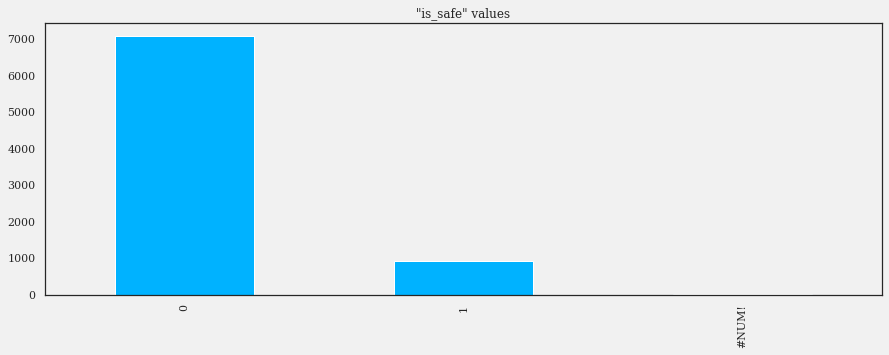

In [84]:
#checking "is_safe" values
water.is_safe.value_counts().plot(kind ='bar',color='#00b2ff')

plt.title('"is_safe" values')

#show the plot
plt.show()

As shown, we have two issues:


1-We are facing the problem that there are some rows that have the value "#NUM!" Which is not correct.

2-Also, we are dealing with an extremely unbalanced data.

In [85]:
#checking wether "ammonia" has "#NUM!" or not since it is the only other object type
water[water["ammonia"]=='#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [86]:
# remove rows that contain 'NUM!'
water = water[~water['is_safe'].str.contains('NUM!')]
# remove rows that contain 'NUM!'
water = water[~water['ammonia'].str.contains('NUM!')]

#convert both columns to numeric data type
water['ammonia'] = pd.to_numeric(water['ammonia'])
water['is_safe'] = pd.to_numeric(water['is_safe'])

In [87]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

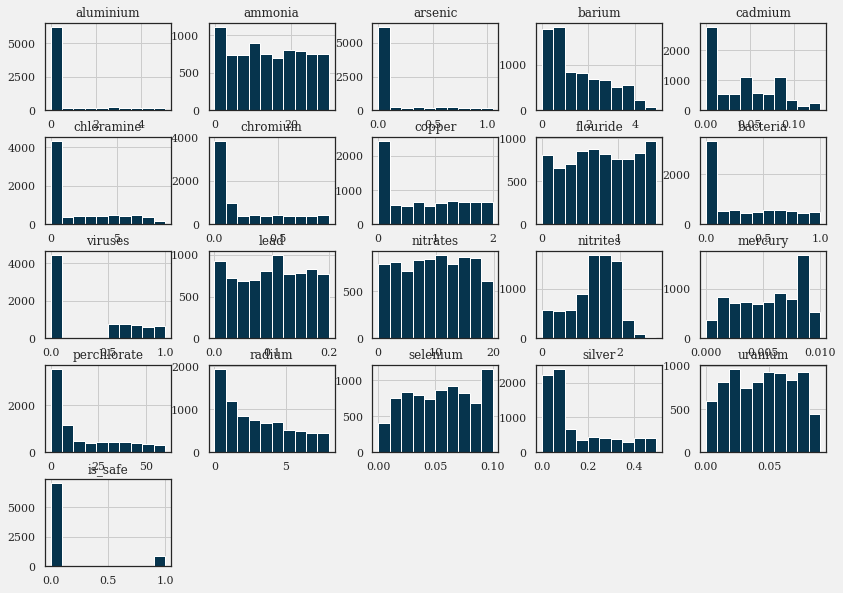

In [88]:
water.hist(figsize=(14,10),color='#06344d');

In [89]:
water.var()

aluminium        1.601043
ammonia         78.835401
arsenic          0.063823
barium           1.479209
cadmium          0.001300
chloramine       6.590565
chromium         0.073259
copper           0.427186
flouride         0.189594
bacteria         0.108568
viruses          0.142970
lead             0.003384
nitrates        30.713504
nitrites         0.328639
mercury          0.000009
perchlorate    312.894586
radium           5.395424
selenium         0.000828
silver           0.020612
uranium          0.000724
is_safe          0.101061
dtype: float64

# ==========================================

# Insights 

There are 20 Independent features and 1 dependent feature. Details for each features are provided above. Our objective is to use the Potability feature as the target feature for 
our classification problem. 
Let us do more analysis to learn about the dataset better.

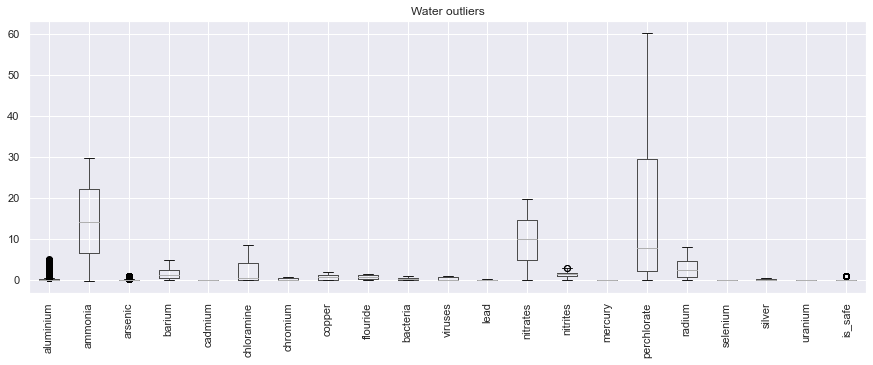

In [90]:
#checking outliers
sns.set(rc={"figure.figsize":(15, 5)})
water.boxplot()
plt.title('Water outliers')
plt.xticks(rotation=90)
plt.show()

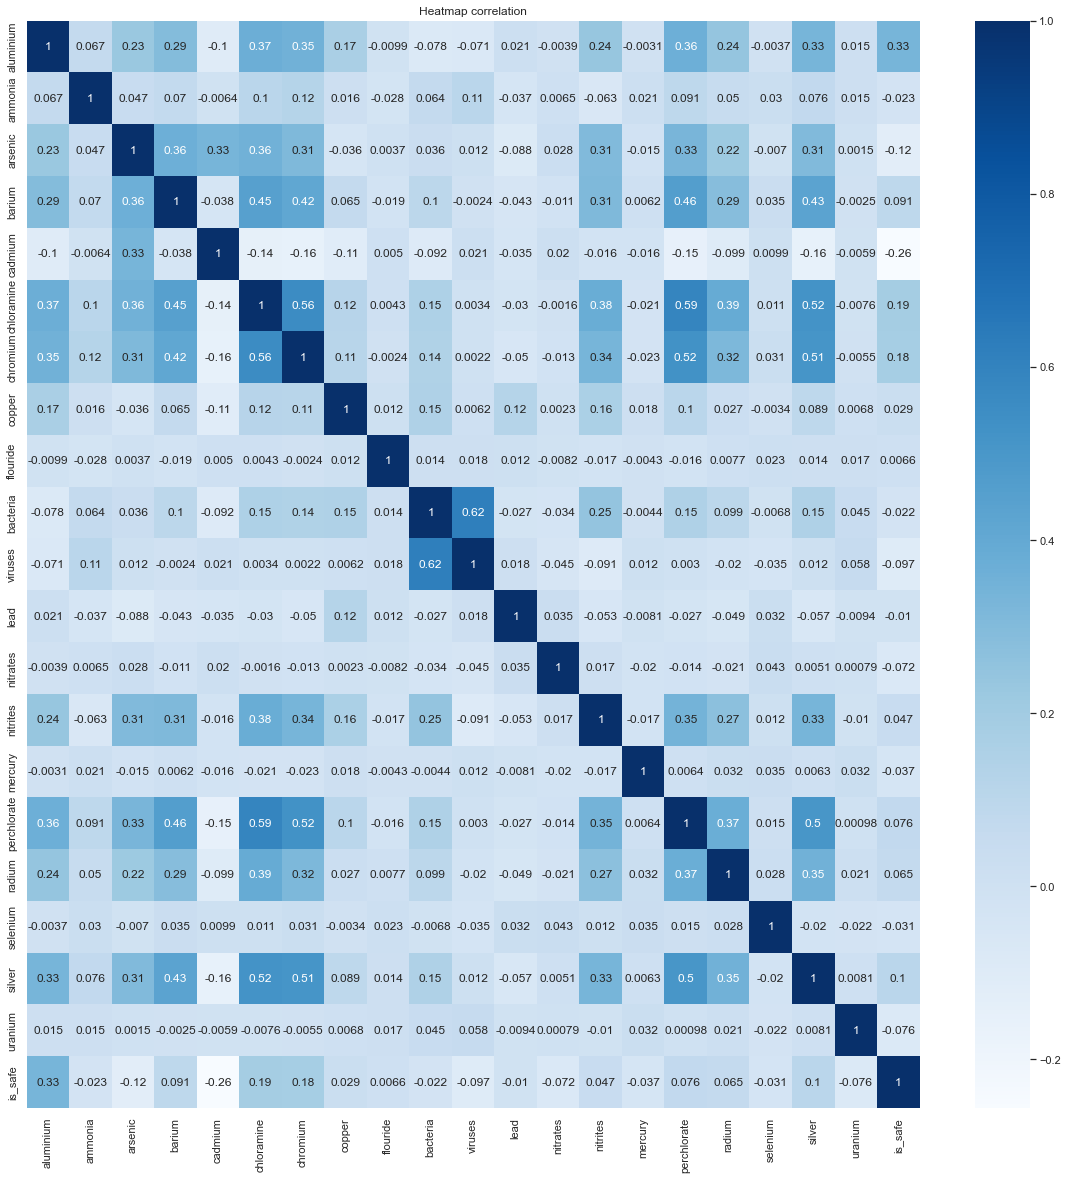

In [91]:
#starting with heatmap to draw correlations
sns.set(rc={"figure.figsize":(20, 20)})
plt.title('Heatmap correlation')
sns.heatmap(water.corr(), annot=True, cmap='Blues'); 

### Q1: How impactful aluminium is on our data?

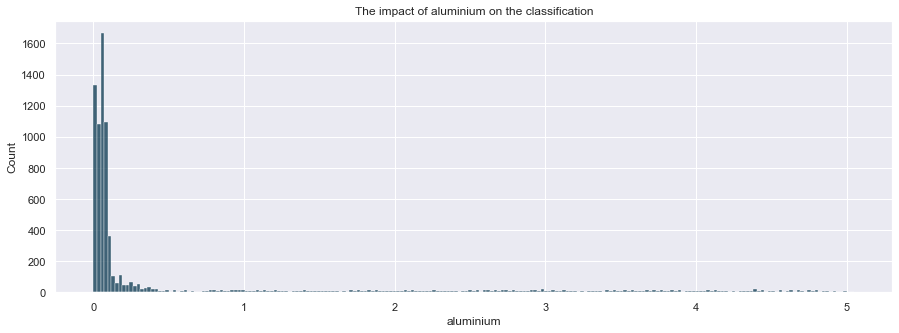

In [92]:
sns.set(rc={"figure.figsize":(15, 5)})
sns.histplot(data=water,x='aluminium',color='#06344d')
plt.title('The impact of aluminium on the classification')
plt.show()

### Q2: How impactful cadmium is on our data?

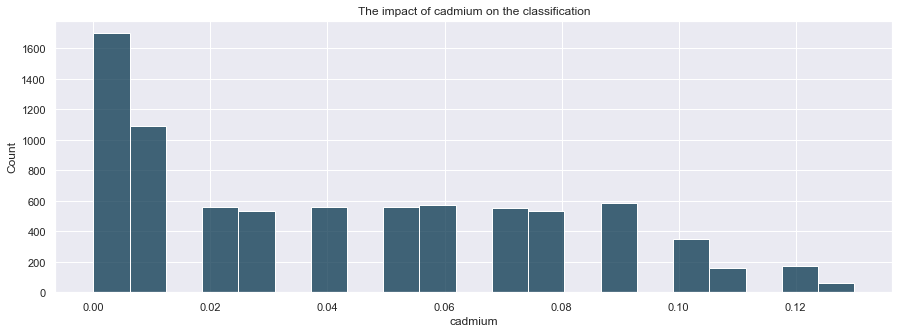

In [93]:
sns.histplot(data=water,x='cadmium',color='#06344d')
plt.title('The impact of cadmium on the classification')
plt.show()

### Q3: How impactful chromium is on our data?

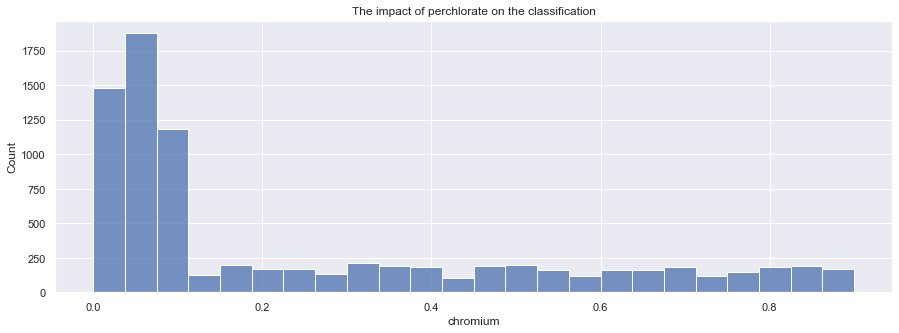

In [94]:
sns.histplot(water['chromium'],palette=colors)
plt.title('The impact of perchlorate on the classification')
plt.show()

### Q4: Does bacteria have a negative effect on the water's safety?

In [95]:
#new dataframe to store 1 and 0 as "Safe" and "Not Safe"
waterToPie= water.copy(deep=True)
waterToPie.loc[waterToPie['is_safe'] == 1, 'is_safe'] = 'Safe'
waterToPie.loc[waterToPie['is_safe'] == 0, 'is_safe'] = 'Not Safe'

fig = px.pie(waterToPie, values='bacteria', names='is_safe', hole=0.4,
             title='How bacteria affects water', color_discrete_sequence=colors)
fig.show()

### Q5: Does mercury have a negative effect on the water's safety?

In [96]:
#check the accumulation of mercury on the water
is_safe_sum=water.groupby(by=["is_safe"]).sum()

fig = px.bar(is_safe_sum, x=is_safe_sum.index, y='mercury', title='How mercury affects water', color_discrete_sequence=colors)
fig.show()
#is_safe_sum.index

### Q:6 What are the components that can affect water cleaniness?

In [97]:
#plotting water based on components
metal=(water['silver']+water['radium']+water['aluminium']+water['barium']+water['cadmium']+water['mercury']+water['chromium']+water['copper']+water['lead']).sum()
gas=(water['uranium']+water['ammonia']+water['chloramine']+water['nitrites']).sum()
metalloid=(water['arsenic']+water['selenium']).sum()
salts=(water['flouride']+water['nitrates']+water['perchlorate']).sum()
organisms=(water['bacteria']+water['viruses']+water['chloramine']+water['nitrites']).sum()
#making the components dataframe
water_components=pd.DataFrame([['metal', metal], ['gas', gas], ['metalloid', metalloid], 
                              ['salts', salts], ['organisms', organisms]], columns=['type', 'value'])

fig = px.pie(water_components, values='value', names='type', hole=0.4,
             title='Water components', color_discrete_sequence=colors)
fig.show()


# ==========================================

# Further cleaning and oversampling data

In [98]:
#preparing data for splitting
X = water.drop(['is_safe'], axis=1)
y = water['is_safe']


Text(0.7, 6000, 'Safe for Human consumption')

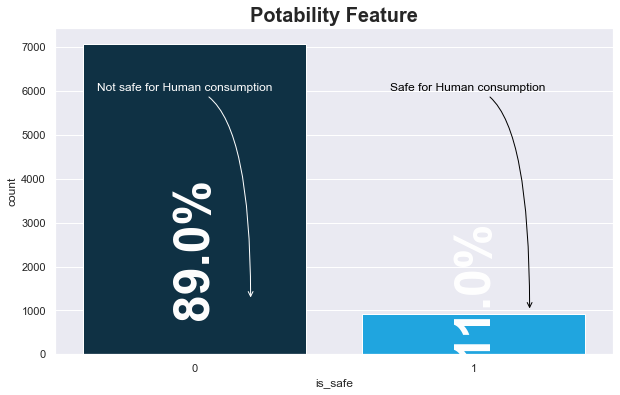

In [99]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=water, x='is_safe', palette=colors)
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(water)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(-0.35,6000),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='white', connectionstyle="angle3,angleA=0,angleB=90"), color='white')
plt.annotate(text="Safe for Human consumption", xytext=(0.7,6000),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')




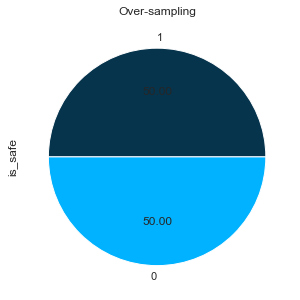

In [100]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority") # String
X , y = ros.fit_resample(X, y)

ax = y.value_counts().plot.pie(autopct='%.2f', colors=colors)
_ = ax.set_title("Over-sampling")

In [101]:
#normalizing our dataset
scaler=MinMaxScaler()
normalized=scaler.fit_transform(X)
print(normalized)

[[0.32673267 0.30614973 0.03809524 ... 0.8        0.68       0.22222222]
 [0.45940594 0.70989305 0.00952381 ... 0.8        0.54       0.55555556]
 [0.2        0.47125668 0.03809524 ... 0.7        0.88       0.11111111]
 ...
 [0.00594059 0.75635027 0.01904762 ... 0.3        0.2        0.11111111]
 [0.01188119 0.59592246 0.00952381 ... 1.         0.1        0.88888889]
 [0.01188119 0.59592246 0.00952381 ... 1.         0.1        0.88888889]]


In [102]:
#balancing categories of our target feature
y.value_counts()

1    7084
0    7084
Name: is_safe, dtype: int64

In [103]:
balanced_dataset=pd.DataFrame(y)

Text(0.7, 6000, 'Safe for Human consumption')

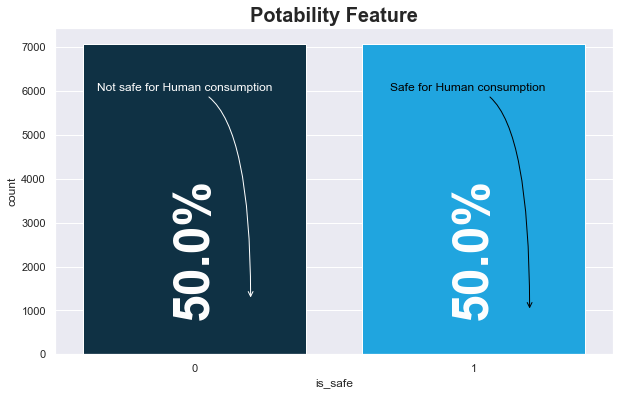

In [104]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=balanced_dataset, x='is_safe',palette=colors)
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(y)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(-0.35,6000),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='white', connectionstyle="angle3,angleA=0,angleB=90"), color='white')
plt.annotate(text="Safe for Human consumption", xytext=(0.7,6000),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')


# ==========================================

# EDA (SKIP BUT DONT DELETE, I DELETE AT THE END WHEN EVERYTHING IS WORKING FINE)


In [123]:
import importlib
import importlib_metadata as metadata
importlib.metadata = metadata
import nbconvert
import datetime as dt


In [124]:
# Start of Pandas Profiling process
start_time = dt.datetime.now()
print("Started at ", start_time)

Started at  2023-06-09 11:35:30.981756


from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(water)


create_report(water)

# =============================================================

from autoviz.AutoViz_Class import AutoViz_Class
try:
    filename = water
    depVar = 'is _safe'
    sep=','
    AV = AutoViz_Class()

    %matplotlib inline

    _ = AV.AutoViz('',
        sep=",",
        depVar="",
        dfte=water,
        header=0,
        verbose=1,
        lowess=False,
        chart_format="bokeh",##server
        max_rows_analyzed=150000,
        max_cols_analyzed=30,
        save_plot_dir=None)
except ValueError:
    print("Stopped")


In [77]:
#show coulmns in dataset
water.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

### Datatype of the features (ALSO SKIP)

In [78]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [79]:
#n. of rows and columns
water.shape

(7996, 21)

Observation:


There are 20 Independent features and 1 dependent features. Details for each features are provided in the above top. objective is to use the Potability feature as target feature for classification problem. Let is do more analysis to learn about the dataset better.

In [80]:
#water['is_safe']=water['is_safe'].astype('category')

In [81]:
water['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

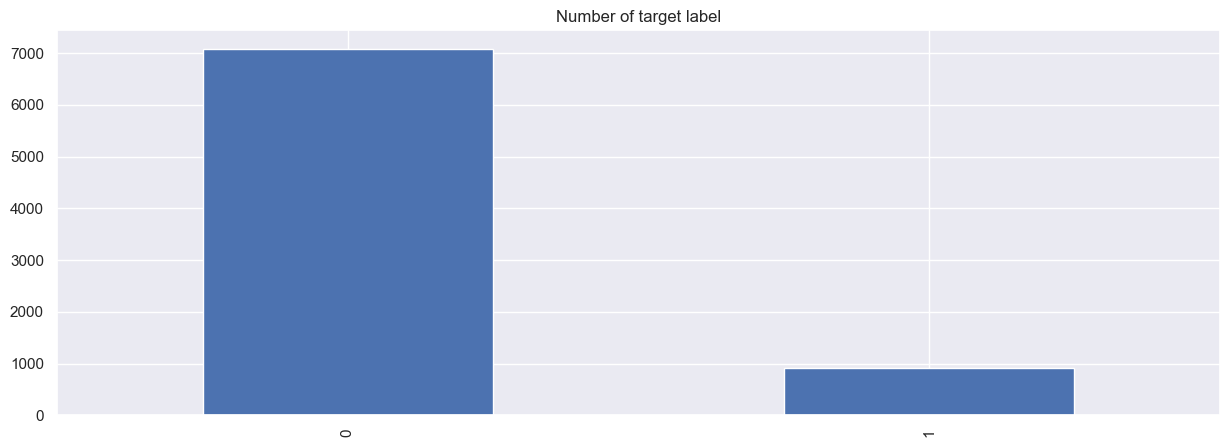

In [82]:
water.is_safe.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

In [83]:
#type of variables 
water.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In [84]:
#more info
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

Observation:
As we see all the data is numeric

In [85]:
#Finding null values
#water.isnull().sum()

Observation:


1.  There's no field with null values



In [86]:
#find count ,mean and std of values 
water.describe().T.round(2)
 # for Including only numeric columns in a DataFrame description. include=[np.number]

,count,mean,std,min,25%,50%,75%,max
aluminium,7996.0,0.67,1.27,0.00,0.04,0.07,0.28,5.05
ammonia,7996.0,14.28,8.88,-0.08,6.58,14.13,22.13,29.84
arsenic,7996.0,0.16,0.25,0.00,0.03,0.05,0.10,1.05
barium,7996.0,1.57,1.22,0.00,0.56,1.19,2.48,4.94
cadmium,7996.0,0.04,0.04,0.00,0.01,0.04,0.07,0.13
chloramine,7996.0,2.18,2.57,0.00,0.10,0.53,4.24,8.68
chromium,7996.0,0.25,0.27,0.00,0.05,0.09,0.44,0.90
copper,7996.0,0.81,0.65,0.00,0.09,0.75,1.39,2.00
flouride,7996.0,0.77,0.44,0.00,0.41,0.77,1.16,1.50
bacteria,7996.0,0.32,0.33,0.00,0.00,0.22,0.61,1.00


In [87]:
water.is_safe.unique()

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'The impact of aluminium on the classifying')

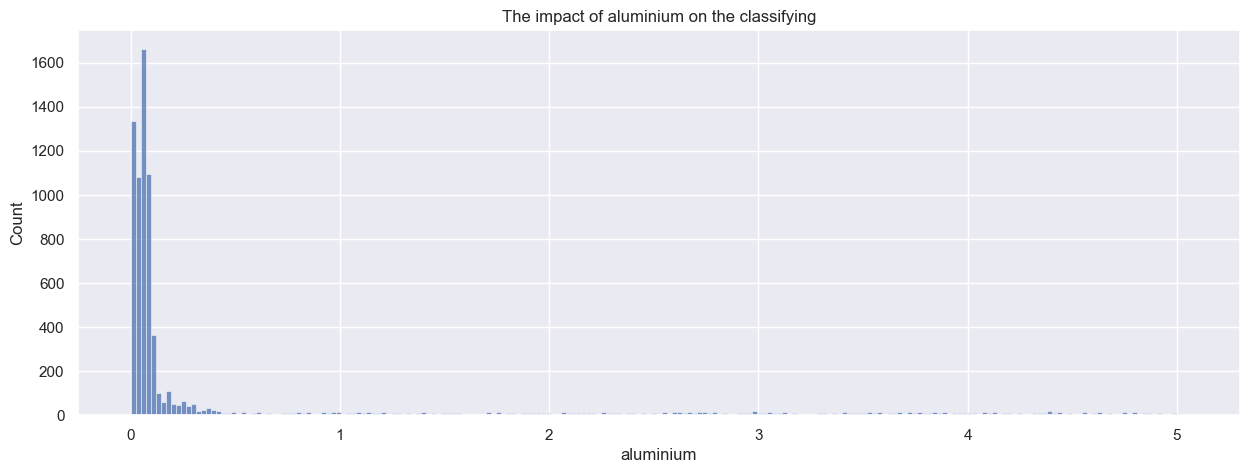

In [88]:
sns.histplot(water['aluminium'])
plt.title('The impact of aluminium on the classifying')

Text(0.5, 1.0, 'The impact of cadmium on the classifying')

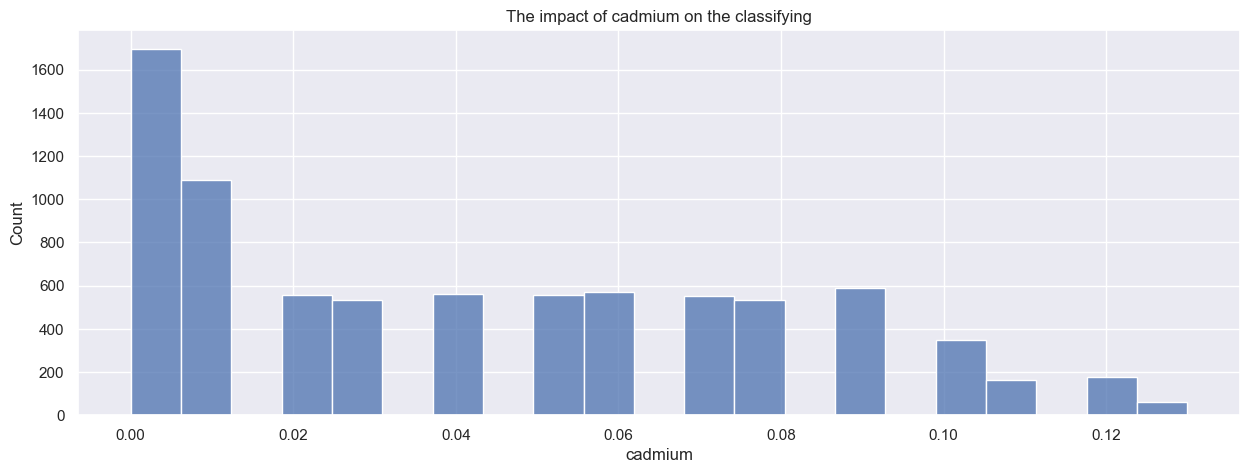

In [89]:
sns.histplot(water['cadmium'])
plt.title('The impact of cadmium on the classifying')

Text(0.5, 1.0, 'The impact of perchlorate on the classifying')

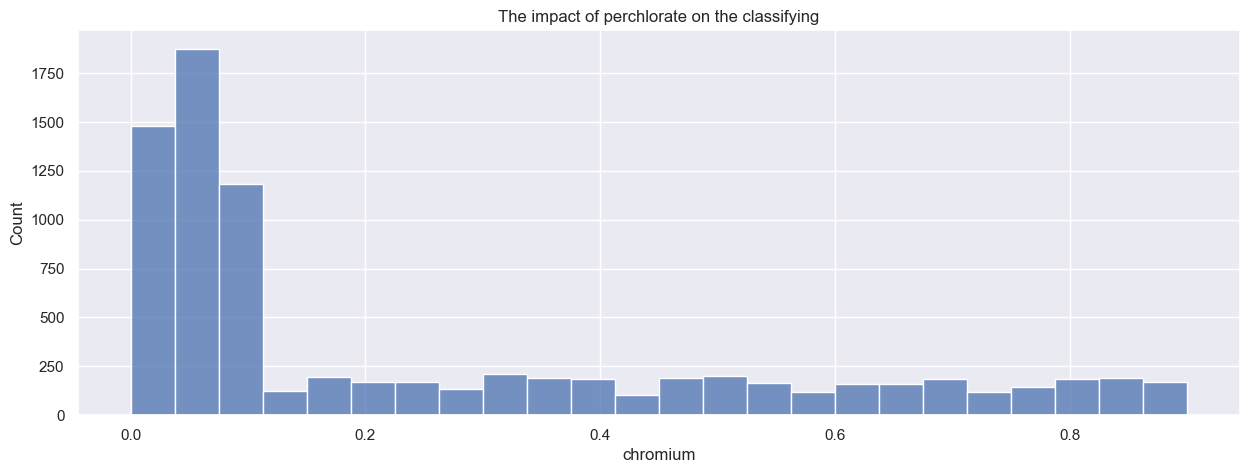

In [90]:
sns.histplot(water['chromium'])
plt.title('The impact of perchlorate on the classifying')

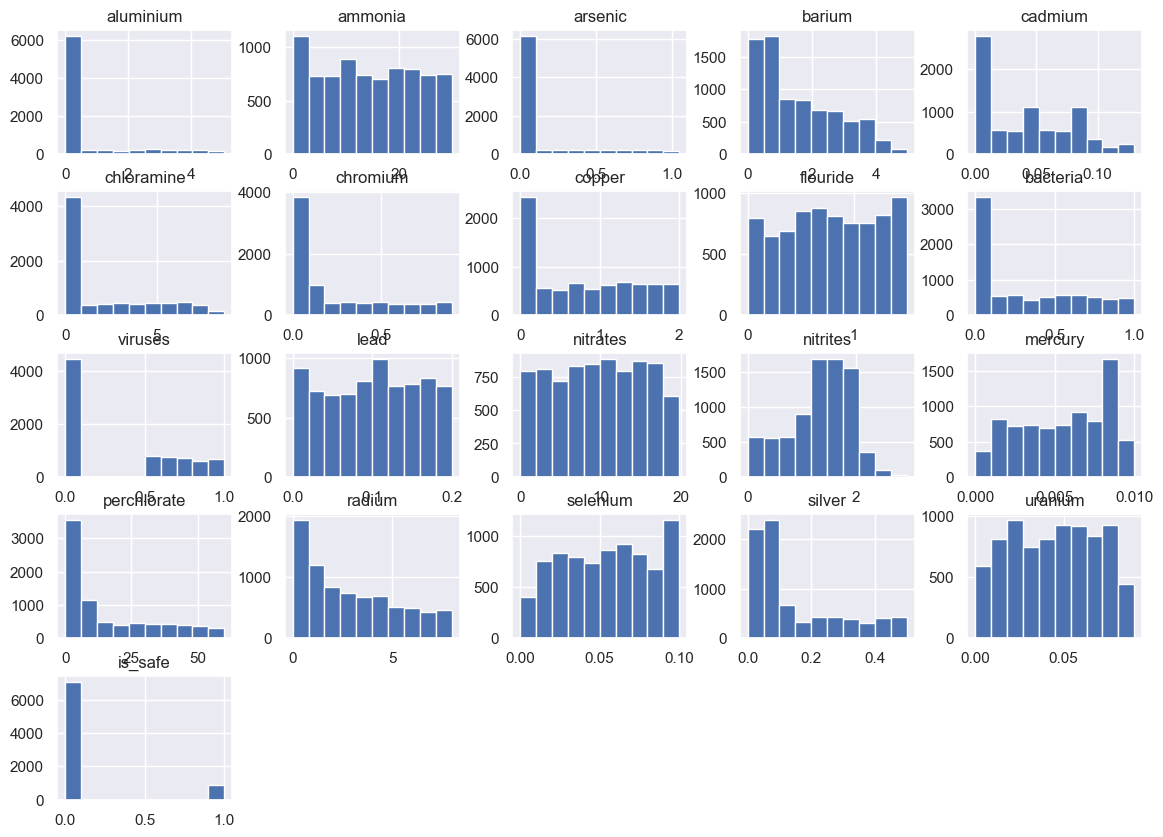

In [91]:
water.hist(figsize=(14,10));

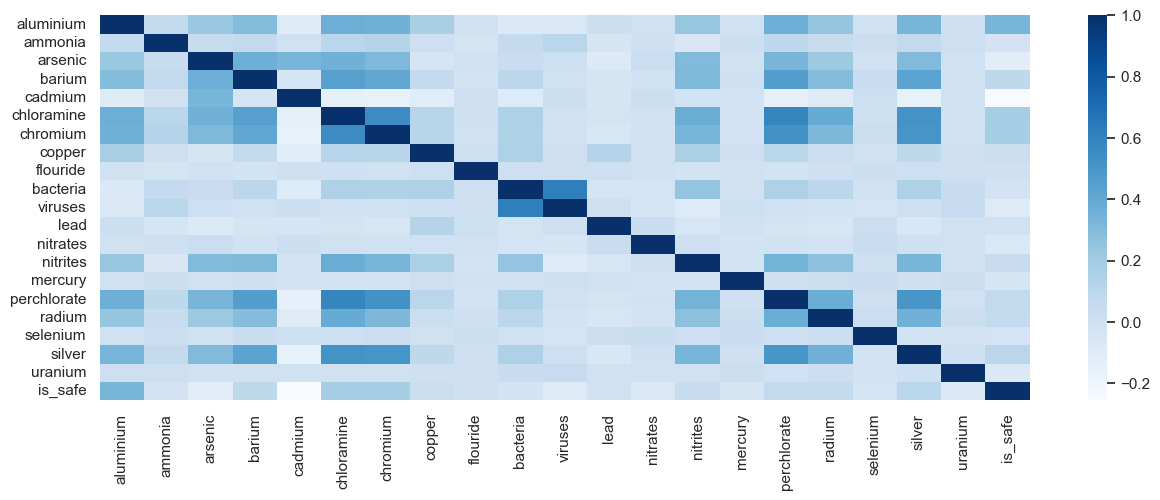

In [92]:
sns.heatmap(water.corr(),cmap='Blues'); 

Observation:


1.   Looks that the features correlated to each other.
It calls the case of collinearity 



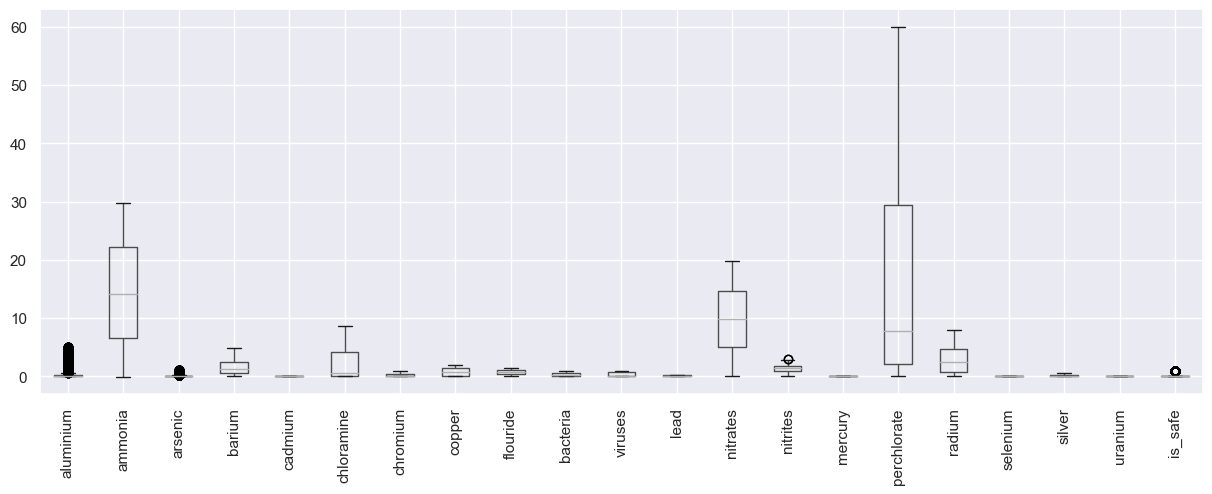

In [93]:
# outliers

water.boxplot()
plt.xticks(rotation=90)
plt.show()

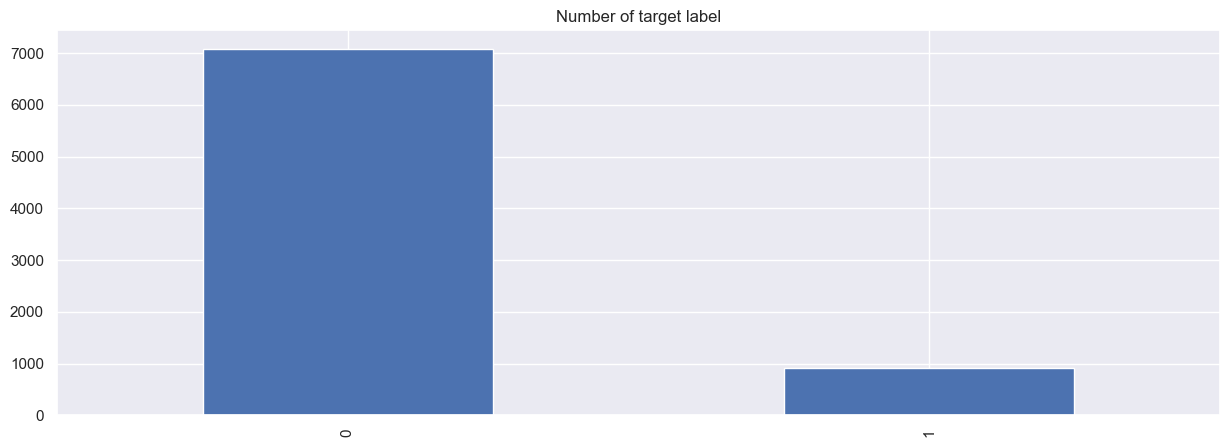

In [94]:
water.is_safe.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

As it shown , we have two issues 


1-we are facing the problem that there’s some rows have the value NUM! Which is not correct 

2-also ,we are dealing with extremely unbalanced data

# EDA (ALSO SKIP)

In [95]:
# remove rows that contain 'NUM!'
water = water[~water['is_safe'].str.contains('NUM!')]

AttributeError: Can only use .str accessor with string values!

In [ ]:
water['is_safe'].value_counts()

In [ ]:
water.is_safe.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

In [ ]:
water.dtypes

In [41]:
#convert both columns to numeric data type
water['ammonia'] = pd.to_numeric(water['ammonia'])
water['is_safe'] = pd.to_numeric(water['is_safe'])

In [ ]:
water.dtypes

In [ ]:
water.describe()

In [ ]:
#check the class frequency using value_counts and find the class distribution ratio before solving the problem

water.is_safe.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

In [ ]:
water.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(water.corr(), cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
X

In [42]:
scaler=MinMaxScaler()
normalized=scaler.fit_transform(X)
print(normalized)

[[0.32673267 0.30614973 0.03809524 ... 0.8        0.68       0.22222222]
 [0.45940594 0.70989305 0.00952381 ... 0.8        0.54       0.55555556]
 [0.2        0.47125668 0.03809524 ... 0.7        0.88       0.11111111]
 ...
 [0.07128713 0.32419786 0.03809524 ... 0.4        0.82       0.66666667]
 [0.01584158 0.01370321 0.33333333 ... 0.         0.06       0.22222222]
 [0.68712871 0.53208556 0.01904762 ... 0.6        0.24       0.88888889]]


In [ ]:
y

In [ ]:
y.value_counts()

In [ ]:
y.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

# Machine Learning Models (STOP SKIPPING)

### Splitting the data

In [105]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#from sklearn.metrics import classification_report

samp = SMOTE()
X=water.drop(['is_safe'], axis=1)
y=water['is_safe']
#from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Feature Importance using RandomForestClassifier

In [106]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train,y_train)
importance = rf_model.feature_importances_

In [107]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

Text(0.5, 0, 'Feature Importance')

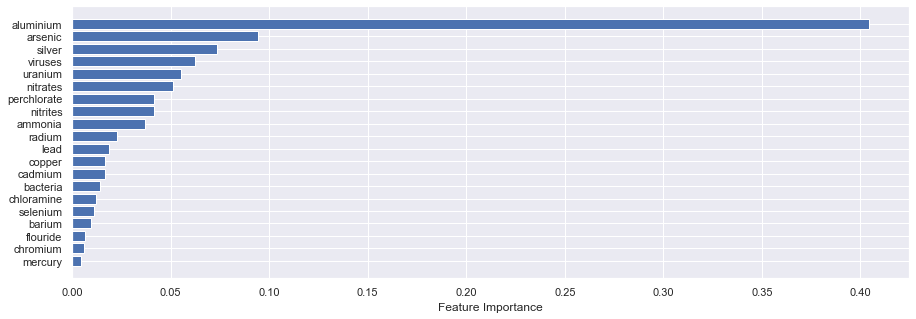

In [108]:
sort = rf.feature_importances_.argsort()
plt.barh(X.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

## Bagging Classifier Model

In [ ]:
from sklearn.ensemble import  BaggingClassifier

model = BaggingClassifier(n_estimators=80)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix
#model = BaggingClassifier(n_estimators=80)
#model.fit(X_train,y_train)
#pred = model.predict(X_test)
#print(classification_report(y_test, pred))
#sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
#Baggin classifier taining and test scores
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

In [ ]:
model.predict_proba(X_test)

## DT Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 80% TRAIN 20% TEST

In [ ]:
X_train.shape,X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
DT_model= DecisionTreeClassifier() 
DT_model.fit(X_train,y_train)

In [ ]:
DT_pred =DT_model.predict(X_test)

In [ ]:
DT_model.get_params()

In [ ]:
feature_names= X.columns

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(DT_model,
          feature_names=feature_names,
          class_names={0:"not safe",1:"safe"},
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

In [ ]:
print('Training set score: {:.4f}'.format(DT_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(DT_model.score(X_test, y_test)))

In [ ]:
print('confusion matrix: ')
confusion_matrix(y_test, DT_pred,labels=[0,1])  

In [ ]:
DT_acc = accuracy_score(y_test, DT_pred)
print('Accuracy is: ',DT_acc)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, DT_pred))


In [ ]:
#from sklearn.metrics import classification_report
print(classification_report(y_test,DT_pred))

# Gaussian Naive Beyes Model

In [ ]:
#Run GaussianNB with default hyperparameters
from sklearn.naive_bayes import GaussianNB


# instantiate classifier with default hyperparameters
gnb = GaussianNB()
# fit classifier to training set
gnb.fit(X_train, y_train)
# make predictions on test set
gnb_predict=gnb.predict(X_test)
# compute and print accuracy score
print(classification_report(y_test, gnb_predict))
sns.heatmap(confusion_matrix(y_test, gnb_predict), annot=True, fmt='.2f');

In [ ]:
#GaussianNB taining and test scores
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

# Support Vector Machine Model

In [ ]:
#Run SVM with default hyperparameters
from sklearn.svm import SVC 

# instantiate classifier with default hyperparameters
svc=SVC() 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
#print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
SVM_acc = accuracy_score(y_test, y_pred)
print('Accuracy is: ',SVM_acc)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
sns.heatmap(cm, annot=True, fmt='.2f');

In [ ]:
#Step 3: Confusion Matrix and Evalution matrix
#from sklearn.metrics import confusion_matrix
#SVM_acc = accuracy_score(y_test, y_pred)
#print('Accuracy is: ',SVM_acc)
#print('Misclassification Rate',1 - metrics.accuracy_score(y_test, y_pred))
#cm = confusion_matrix(y_test, y_pred)
#cm
#print(classification_report(y_test,y_pred))

In [ ]:
#SVM taining and test scores
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

# Try different hyperparameters during training 


**Use GridSearchCV to find the best values for hyperparameter**

### Best values for DT

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,5),
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

# Create a decision tree classifier
DT_model_h = DecisionTreeClassifier(random_state=0)

# Use GridSearchCV to find the best hyperparameters
DT_model_h = GridSearchCV(DT_model_h, params, cv=5,n_jobs=5,verbose=1)

In [ ]:
DT_model_h.fit(X_train, y_train)

In [ ]:
h_pred =DT_model_h.predict(X_test)

In [ ]:
# Print the best hyperparameters
print("Best hyperparameters is:", DT_model_h.best_params_)

In [ ]:
# Create a decision tree classifier with the best hyperparameters
DT_best = DecisionTreeClassifier(criterion ='gini', max_depth = 4, max_features =None, splitter ='best')
DT_best.fit(X_train, y_train)
best_pred = DT_best.predict(X_test)

DT_acc_best = accuracy_score(y_test, best_pred)
print('Accuracy is: ',DT_acc_best)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, best_pred))
# Make predictions on the testing data

print(classification_report(y_test,best_pred))

In [ ]:
#from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(DT_best,
          feature_names=feature_names,
          class_names={0:"not safe",1:"safe"},
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

In [ ]:
print('Training set score: {:.4f}'.format(DT_best.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(DT_best.score(X_test, y_test)))

### Best values for SVM

In [ ]:
#Run SVM with default hyperparameters
#from sklearn.svm import SVC 

# instantiate classifier with default hyperparameters
#svc=SVC() 


# fit classifier to training set
#svc.fit(X_train,y_train)


# make predictions on test set
#y_pred=svc.predict(X_test)


# compute and print accuracy score
#print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
#Step 3: Confusion Matrix and Evalution matrix
from sklearn.metrics import confusion_matrix
SVM_acc = accuracy_score(y_test, y_pred)
print('Accuracy is: ',SVM_acc)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm
print(classification_report(y_test,y_pred))

In [ ]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

**Hyperparameter using GridSearch CV**

### Best values for SVM

In [ ]:
# declare parameters for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters is:", grid.best_params_)

In [ ]:
classifier = SVC(kernel = 'rbf', gamma = 1 , C = 100)
classifier.fit(X_train, y_train)

In [ ]:
SVM_pred =classifier.predict(X_test)

In [ ]:
#Step 3: Confusion Matrix and Evalution matrix
from sklearn.metrics import confusion_matrix
SVM_acc = accuracy_score(y_test, SVM_pred)
print('Accuracy is: ',SVM_acc)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, SVM_pred))
cm = confusion_matrix(y_test, SVM_pred)
cm
print(classification_report(y_test,SVM_pred))

In [ ]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import roc_curve, auc
#best_dt
dt_fpr, dt_tpr, threshold = roc_curve(y_test, best_pred)
auc_dt = auc(dt_fpr, dt_tpr)
#best_svm
svm_fpr, svm_tpr, threshold = roc_curve(y_test, SVM_pred)
auc_svm = auc(svm_fpr, svm_tpr)
#dt
DT_fpr, DT_tpr, threshold = roc_curve(y_test, DT_pred)
auc_DT = auc(DT_fpr, DT_tpr)
#svm
SVM_fpr, SVM_tpr, threshold = roc_curve(y_test, y_pred)
auc_SVM = auc(SVM_fpr, SVM_tpr)


plt.figure(figsize=(10, 10), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM with tuning (auc = %0.2f)' % auc_svm)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT with tuning(auc = %0.2f)' % auc_dt)
plt.plot(SVM_fpr, SVM_tpr, linestyle='-', label='SVM(auc = %0.2f)' % auc_SVM)
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT(auc = %0.2f)' % auc_DT)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()